<a href="https://colab.research.google.com/github/tarakantaacharya/BharatIntern_task1/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
d=pd.read_csv('housing_price_dataset.csv')
print(d.head())

X=d.iloc[:,[0,1,2]]
Y=d.iloc[:,5]
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(X, Y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

from sklearn.tree import DecisionTreeRegressor
b=DecisionTreeRegressor(max_depth=6)
from sklearn.linear_model import Ridge
c=Ridge()
from sklearn.linear_model import Lasso
d=Lasso()
from sklearn.ensemble import RandomForestRegressor
e=RandomForestRegressor()
from sklearn.linear_model import LinearRegression
f=LinearRegression()

b.fit(X_train,Y_train)
predictions=b.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print("Dec Mean Squared Error:", mse)

c.fit(X_train,y_train)
predictions1=c.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions1)
print("Ridge Mean Squared Error:", mse)

d.fit(X_train,y_train)
predictions2=d.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions2)
print("Lasso Mean Squared Error:", mse)

e.fit(X_train,y_train)
predictions3=e.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions3)
print("Random Mean Squared Error:", mse)

f.fit(X_train,y_train)
predictions4=f.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions4)
print("Lin Mean Squared Error:", mse)

   SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0        2126         4          1        Rural       1969  215355.283618
1        2459         3          2        Rural       1980  195014.221626
2        1860         2          1       Suburb       1970  306891.012076
3        2294         2          1        Urban       1996  206786.787153
4        2130         5          2       Suburb       2001  272436.239065
Dec Mean Squared Error: 5716136039.764232
Ridge Mean Squared Error: 2451644898.254956
Lasso Mean Squared Error: 2451640349.6590867
Random Mean Squared Error: 3302910179.031675
Lin Mean Squared Error: 2451645430.3171725


In [ ]:
df2={'SquareFeet':2854,'Bedrooms':3.5,'Bathrooms':2}
df2=pd.DataFrame(df2,index=[0])
print(df2)
predictions=b.predict(df2)
print('Price for the df2 data:',predictions)

   SquareFeet  Bedrooms  Bathrooms
0        2854       3.5          2
Price for the df2 data: [308953.39045686]


In [24]:
# Loading the dataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Read the dataset
d = pd.read_csv('housing_price_dataset.csv')
print(d)

# Selecting features and target
X = d.iloc[:, [0, 1, 2]]
Y = d.iloc[:, 5]

# Splitting the data into training, validation, and test sets
X_train, X_rem, y_train, y_rem = train_test_split(X, Y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

# Using Ridge regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
predictions1 = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, predictions1)
print("Ridge Mean Squared Error:", mse_ridge)

# Using TensorFlow to reduce the MSE
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Adding regularization and dropout
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Predict and evaluate
y_pred = model.predict(X_test)
mse_tf = model.evaluate(X_test, y_test, verbose=0)
print("TensorFlow Mean Squared Error:", mse_tf)

# Prediction for new data
df2 = pd.DataFrame({'SquareFeet': [2854], 'Bedrooms': [3.5], 'Bathrooms': [2]})
print(df2)
predictions_new = ridge_model.predict(df2)
print('Price for the new data:', predictions_new)


       SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0            2126         4          1        Rural       1969  215355.283618
1            2459         3          2        Rural       1980  195014.221626
2            1860         2          1       Suburb       1970  306891.012076
3            2294         2          1        Urban       1996  206786.787153
4            2130         5          2       Suburb       2001  272436.239065
...           ...       ...        ...          ...        ...            ...
49995        1282         5          3        Rural       1975  100080.865895
49996        2854         2          2       Suburb       1988  374507.656727
49997        2979         5          3       Suburb       1962  384110.555590
49998        2596         5          2        Rural       1984  380512.685957
49999        1572         5          3        Rural       2011  221618.583218

[50000 rows x 6 columns]
Ridge Mean Squared Error: 2451644898.2

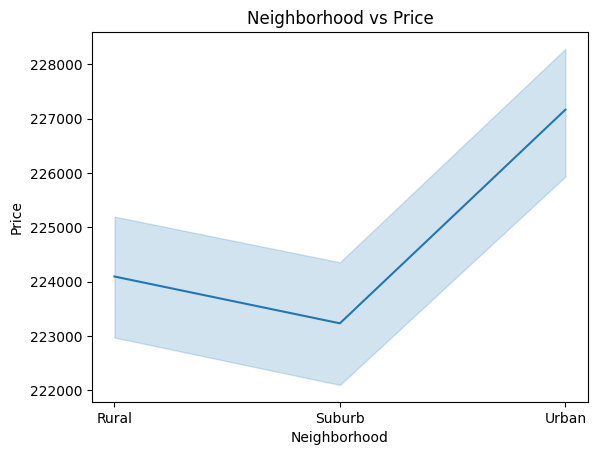

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
x=d['Neighborhood']
y=d['Price']
sns.lineplot(x=x,y=y)
plt.title('Neighborhood vs Price')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
print('\n')

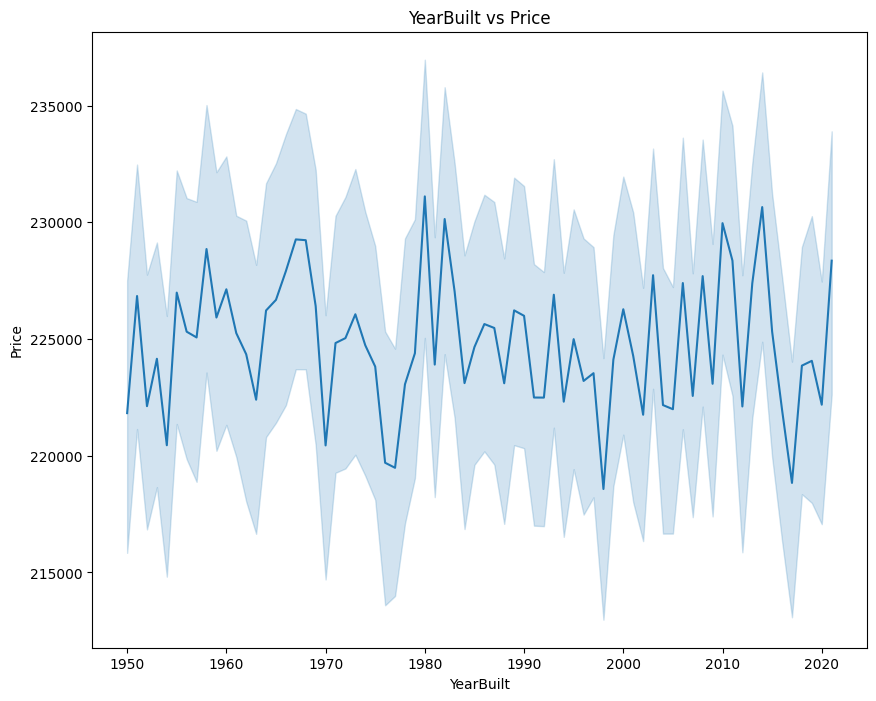

In [34]:
x1=d['YearBuilt']
y1=d['Price']
plt.figure(figsize=(10,8))
sns.lineplot(x=x1,y=y1)
plt.title('YearBuilt vs Price')
plt.xlabel('YearBuilt')
plt.ylabel('Price')
print('\n')

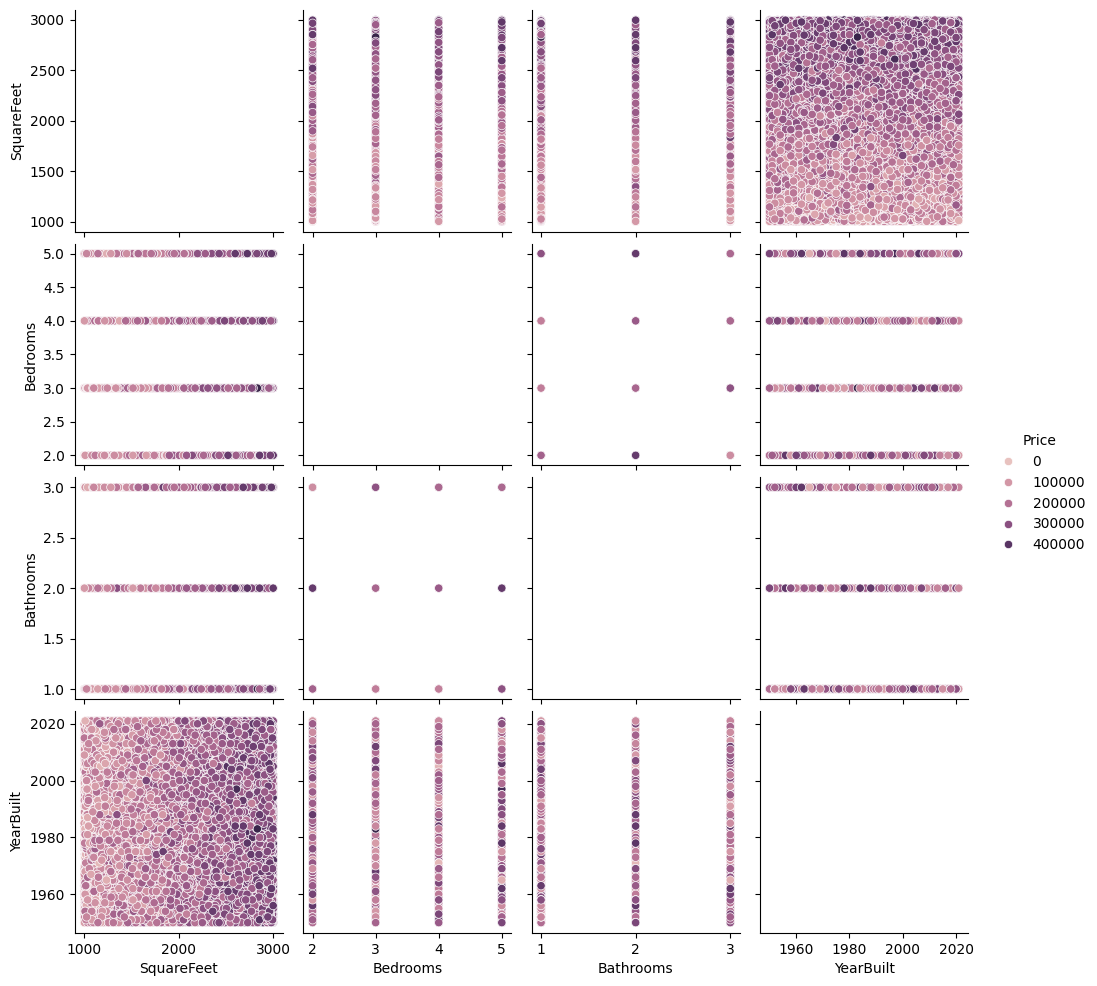

In [38]:
sns.pairplot(d,hue='Price')